<a href="https://colab.research.google.com/github/pias97/Fake-News-Detection-on-English-Dataset/blob/main/Fake%20News%20Detection%20proj_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library Import

In [ ]:
#Library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

#Feature extraction and splitting
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

#Model
from sklearn import naive_bayes
from sklearn.svm import SVC

#Evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
import itertools

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
data = pd.read_csv("/content/data.csv")
data.shape

(4009, 4)

In [ ]:
data.head(5)

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [ ]:
data = data.drop(['URLs'], axis=1)
data.head(5)

,Headline,Body,Label
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  4009 non-null   object
 1   Body      3988 non-null   object
 2   Label     4009 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 94.1+ KB


In [ ]:
data.isnull().sum()

Headline     0
Body        21
Label        0
dtype: int64

In [ ]:
df1 = data[data.isna().any(axis=1)]
df1.head

<bound method NDFrame.head of                                                Headline Body  Label
247   Read Al Green's Resolution to Impeach Donald T...  NaN      1
269                  The Prophet of Germany’s New Right  NaN      1
325              Hunting the terror group from 70,000ft  NaN      1
395   10 Shocking Facts About Porn You Probably Didn...  NaN      0
509   10/5 TRS-PNC Park: Bucs Win in '71, '79; Lose ...  NaN      0
882   10/3 Happenings: HBD Cap, Johnny, Dog, Tomato,...  NaN      0
973                        Ravens @ Raiders - Wednesday  NaN      0
981   10/4 TRS-PNC Park Era: Reds Thump Buc 3x in Pl...  NaN      0
1006  A Comprehensive Database on Chemtrails and Wea...  NaN      0
1133  10/6: HBD Eddie, Tom, Gene, Jeff, Joel & Radha...  NaN      0
1210  10/5 Expo Park-Forbes Field: Bucs Win '60 Open...  NaN      0
1500  Full Text: New Travel Restrictions issued 9/24/17  NaN      0
1785                        Ravens @ Raiders - Thursday  NaN      0
2254  New U.N. Rep

In [ ]:
data = data[data['Body'].notna()]
data.shape


(3988, 3)

In [ ]:
data[data.duplicated(['Headline','Body'])]

,Headline,Body,Label
172,Just Shut Up & Play Some Damn Baseball!!,Just Shut Up & Play Some Damn Baseball!!\n(Bef...,0
287,Podcast - @Hokiesmash_ASD & @TalkinACCSports t...,Podcast – @Hokiesmash_ASD & @TalkinACCSports t...,0
298,"At Queens Museum, the Director Is as Political...","But Ms. Raicovich, 44, almost three years into...",1
312,"'Blade Runner,' 'Westworld' test our empathy",(CNN) The following contains major spoilers ab...,1
324,Diary of Anne Frank transformed into graphic a...,Image caption Seventy years after its first pu...,1
...,...,...,...
3987,"Services announced for Solomon Caesar, gospel ...","Services announced for Solomon Caesar, gospel ...",0
3990,"Saturday: Two To Go - Jamo v Max Scherzer, Lin...","Saturday: Two To Go – Jamo v Max Scherzer, Lin...",0
3991,Matchup: Bulls v Mud Hens,Matchup: Bulls v Mud Hens\n% of readers think ...,0
3996,The Spy in the IRA,The Spy in the IRA\n(Before It's News)\nIn the...,0


In [ ]:
data = data.drop_duplicates(['Headline','Body'])
data.shape

(3522, 3)

#meaning of the label

*   Real 1
*   Fake - 0




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


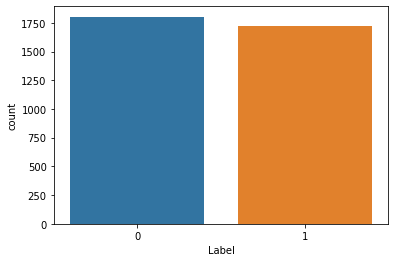

In [ ]:
sns.countplot(data['Label'])

#Merging "HeadLine" and "Body"

In [ ]:
data['NewsText'] = data['Headline'].astype(str) +" "+ data['Body']
data.head(5)

,Headline,Body,Label,NewsText
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,Four ways Bob Corker skewered Donald Trump Ima...
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,Linklater's war veteran comedy speaks to moder...
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,Trump’s Fight With Corker Jeopardizes His Legi...
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,Egypt's Cheiron wins tie-up with Pemex for Mex...
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,Jason Aldean opens 'SNL' with Vegas tribute Co...


#Defining independent and dependent variable

In [ ]:
X = data['NewsText']
Y = data['Label']
X_t = data['Body']
X.head(5)


0    Four ways Bob Corker skewered Donald Trump Ima...
1    Linklater's war veteran comedy speaks to moder...
2    Trump’s Fight With Corker Jeopardizes His Legi...
3    Egypt's Cheiron wins tie-up with Pemex for Mex...
4    Jason Aldean opens 'SNL' with Vegas tribute Co...
Name: NewsText, dtype: object

#Text Cloud

#Word cloud for "Body" Column

In [ ]:
train_qs = pd.Series(X_t.tolist()).astype(str)

(-0.5, 1299.5, 949.5, -0.5)

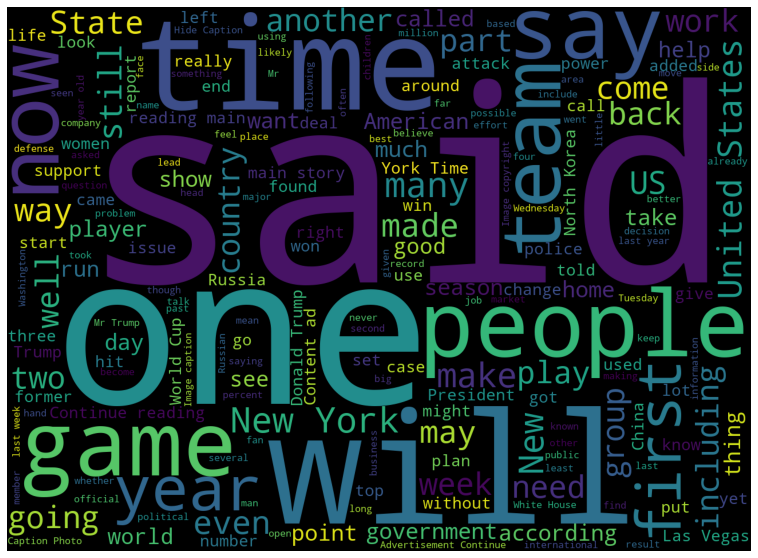

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(width=1300, height=950).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

#Word cloud for the "HeadLine" Column

In [ ]:
train_qs = pd.Series(data['Headline'].tolist()).astype(str)

(-0.5, 1299.5, 949.5, -0.5)

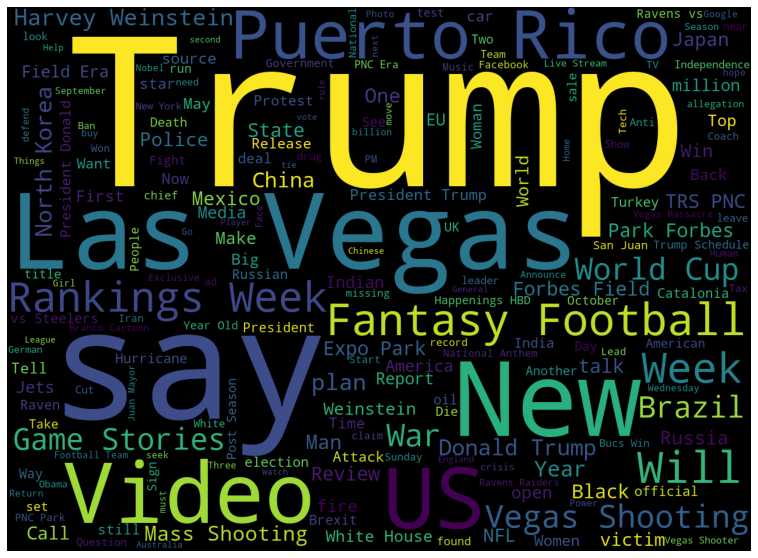

In [ ]:
cloud = WordCloud(width=1300, height=950).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

#Word cloud for the combined ("Headline" + "Body") Columns

In [ ]:
train_qs = pd.Series(X.tolist()).astype(str)

(-0.5, 1299.5, 949.5, -0.5)

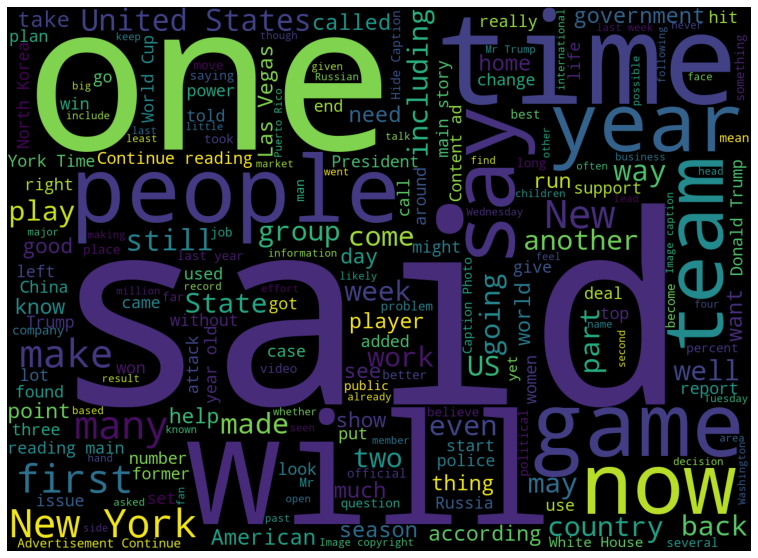

In [ ]:
##word cloud for the text
cloud = WordCloud(width=1300, height=950).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

#Removing Stopwords and applying TF-IDF

In [ ]:
stopset=set(stopwords.words('english'))
vector=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii',stop_words=stopset)

In [ ]:
vector.fit(X) #Data of Combined "HeadLine" + "Body" column 

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...},
                strip_accents='ascii', sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [ ]:
X_tokenized = vector.fit_transform(X)

In [ ]:
max(vector.get_feature_names())

'zypries'

In [ ]:
X_tokenized.shape

(3522, 47532)

In [ ]:
vector.fit(X_t) #Data of "Body" column 

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...},
                strip_accents='ascii', sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [ ]:
X_t_tokenized = vector.fit_transform(X_t)

In [ ]:
X_t_tokenized.shape

(3522, 47336)

In [ ]:
print(X_tokenized)

  (0, 22602)	0.038880387576771126
  (0, 44271)	0.047270692364053596
  (0, 27381)	0.04215928085646491
  (0, 8269)	0.024766193186093823
  (0, 40427)	0.022455208582849953
  (0, 40156)	0.022107435344563497
  (0, 23315)	0.024027479448816145
  (0, 32756)	0.032751918413724136
  (0, 31992)	0.020117769456327303
  (0, 24720)	0.01972432596517297
  (0, 3596)	0.028205338003562744
  (0, 32189)	0.023223446779313817
  (0, 1986)	0.02195625067039276
  (0, 44461)	0.04215928085646491
  (0, 10376)	0.023531297191612822
  (0, 13909)	0.03953742528643057
  (0, 5322)	0.02198616158940845
  (0, 26503)	0.043404058825242085
  (0, 46622)	0.027681981989619096
  (0, 46290)	0.02152582853634556
  (0, 13048)	0.03389433804220562
  (0, 7029)	0.021896905716748613
  (0, 15471)	0.012761713010007114
  (0, 25373)	0.01875411754875017
  (0, 30211)	0.01968448027410774
  :	:
  (3521, 44953)	0.013940072085982665
  (3521, 44970)	0.018374082745686027
  (3521, 42670)	0.0469200450916186
  (3521, 15485)	0.020898011794802565
  (3521, 2055

In [ ]:
print(X_t_tokenized)

  (0, 22507)	0.03953689538844206
  (0, 44090)	0.04806887316250416
  (0, 27277)	0.04287115383257779
  (0, 8243)	0.02518437829960169
  (0, 40261)	0.02310616363592704
  (0, 39994)	0.022511980363646194
  (0, 23217)	0.024749671294120125
  (0, 32632)	0.03330494505841389
  (0, 31872)	0.02050126825799891
  (0, 24620)	0.020159958369990322
  (0, 3586)	0.028681594180114355
  (0, 32069)	0.023615582125044075
  (0, 1983)	0.022326989003483084
  (0, 44279)	0.04287115383257779
  (0, 10343)	0.02413343869935245
  (0, 13850)	0.040205027390515694
  (0, 5307)	0.022606788681689406
  (0, 26400)	0.04413695027650993
  (0, 46429)	0.028149401132055232
  (0, 46099)	0.02188929905368276
  (0, 12995)	0.03446665480865209
  (0, 7008)	0.022296735248310176
  (0, 15407)	0.01300645380028315
  (0, 25272)	0.019105062262703296
  (0, 30097)	0.02011870316524833
  :	:
  (3521, 44767)	0.01468183194768498
  (3521, 44784)	0.019213398655040112
  (3521, 42497)	0.049144920209825305
  (3521, 15420)	0.021861011441243382
  (3521, 20469)	

# Applying confusion matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#MNB on NewsText (Headline + Body) 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_tokenized, Y, random_state=1,test_size=0.2)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(2817, 47532)
(705, 47532)


In [ ]:
MNB = naive_bayes.MultinomialNB()
model=MNB.fit(x_train, y_train)

Accuracy : 0.924822695035461
F1 : 0.9254571026722926
Confusion matrix, without normalization


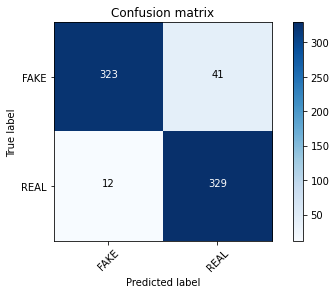

In [ ]:
m1 = model.predict(x_test)
a1 = accuracy_score(y_test, m1)
print("Accuracy :", a1)

ms_f1 = f1_score(y_test, m1)
print("F1 :", ms_f1)

cm = metrics.confusion_matrix(y_test, m1)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


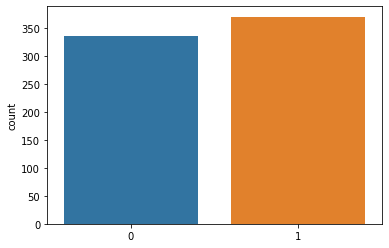

In [ ]:
sns.countplot(m1)

#MNB on just Body

In [ ]:
x_b_train, x_b_test, y_b_train, y_b_test = train_test_split(X_t_tokenized, Y, random_state=1,test_size=0.2)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(2817, 47532)
(705, 47532)


In [ ]:
MNB = naive_bayes.MultinomialNB()
model=MNB.fit(x_b_train, y_b_train)

Accuracy : 0.9361702127659575
Confusion matrix, without normalization


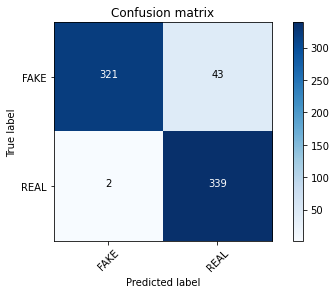

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
m1 = model.predict(x_b_test)
a1 = accuracy_score(y_b_test, m1)
print("Accuracy :", a1)

cm = metrics.confusion_matrix(y_b_test, m1)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

#SVM on NewsText


In [ ]:
svc_model1 = SVC(C=1, kernel='linear', gamma= 1)
svc_model1.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Accuracy : 0.9858156028368794
Confusion matrix, without normalization


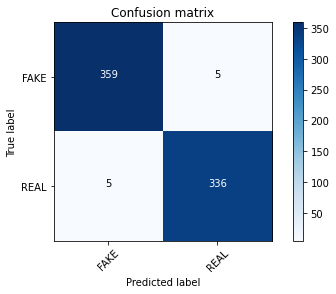

In [ ]:
m2 = svc_model1.predict(x_test)
a2 = accuracy_score(y_test, m2)
print("Accuracy :", a2)

cm = metrics.confusion_matrix(y_test, m2)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

#SVM on Body


In [ ]:
from sklearn.svm import SVC
svc_model1 = SVC(C=1, kernel='linear', gamma= 1)
svc_model1.fit(x_b_train, y_b_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Accuracy : 0.9886524822695035
Confusion matrix, without normalization


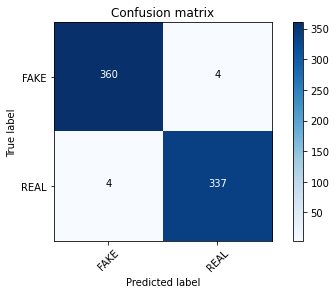

In [ ]:
m2 = svc_model1.predict(x_b_test)
a2 = accuracy_score(y_b_test, m2)
print("Accuracy :", a2)

cm = metrics.confusion_matrix(y_b_test, m2)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])